# Assignment 1
# Pandas and Matplotlib

## Deadline: Thursday, September 28 at 8:00 PM
## The assignment must be submitted in the form of a Jupyter notebook and uploaded to eClass.

## Marks:
- Step 1. Load data into a dataframe. 0.5 marks.
- Step 2. Examine the dataset. 0.5 marks.
- Step 3. Filter columns. 0.5 marks.
- Step 4. Check data quality. 0.5 marks.
- Step 5. Removing and imputing data. 1 mark.
- Step 6. Check balance of data between classes. 0.5 marks.
- Step 7. Visualize correlations of numerical variables. 2 mark.
- Step 8. Check for outliers. 2 mark.
- Total = 10 marks.

## Notes:
This notebook is structured as a series of steps. Earlier steps must be completed before later steps for the code to run. Some partial code is provided; your solution should use that partial code. The solution doesn't need to be pretty! Make sure the code runs without errors. All required imports will be provided for you; you shouldn't import any other modules. You may need to check with the documentation for the NumPy, Matplotlib or Pandas packages, or other online sources. There are multiple solutions for most tasks.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests

def download_data(source, dest):
    base_url = 'https://raw.githubusercontent.com/'
    owner = 'MaralAminpour'
    repo = 'ML-BME-Course-UofA-Fall-2023'
    branch = 'main'
    url = '{}/{}/{}/{}/{}'.format(base_url, owner, repo, branch, source)
    r = requests.get(url)
    f = open(dest, 'wb')
    f.write(r.content)
    f.close()

download_data('Assignments/data/heart.csv', 'heart.csv')

In [3]:
# Step 1. Load data into a dataframe

# The downloaded file heart.csv contains data in a CSV (comma-separated values) formatted text file.
# Load this data into a Pandas dataframe object
# Note that the first row of the CSV file contains the column headers
# Then, print a few of the data rows using head to verify it has been loaded correctly

heart_data = pd.read_csv('heart.csv')
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Step 2. Examine the dataset

# Next we'll just print out some basic info about our dataset
# Print the number of samples
# Print the number of data columns
# Print the header names for each column
# Print the number of missing values - you can use the isna() dataframe method

print('Number of samples: {}'.format(heart_data.shape[0]))
print('Number of data columns: {}'.format(heart_data.shape[1]))
print('Column names: {}'.format(list(heart_data)))
print('Number of missing values: {}'.format(heart_data.isna().sum().sum()))

Number of samples: 918
Number of data columns: 12
Column names: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']
Number of missing values: 0


In [5]:
# Step 3. Filter columns

# Next, let's remove some columns from dataframe to simplify the dataset for the rest of this assignment
# Keep only the Age, RestingBP, Cholesterol and HeartDisease columns

heart_data = heart_data[['Age', 'RestingBP', 'Cholesterol', 'HeartDisease']]
heart_data.head()

,Age,RestingBP,Cholesterol,HeartDisease
0,40,140,289,0
1,49,160,180,1
2,37,130,283,0
3,48,138,214,1
4,54,150,195,0


Here is a data dictionary defining the meaning of the columns remaining in the dataset.

## Data dictionary
  1. Age - Age of the Patient - **Numerical**
  2. RestingBP - Resting Blood Pressure (mm/Hg) - **Numerical**
  3. Cholesterol - Serum Cholesterol (mm/dl) - **Numerical**
  4. HeartDisease - Output Class - **Categorical (1: Heart Disease, 0: Normal)**

In [6]:
# Step 4. Check data quality

# Let's double check that all of the remaining data is reasonable

# Print the min and max for the Age column
print('Minimum age = {}\nMaximum age = {}'.format(heart_data['Age'].min(), heart_data['Age'].max()))

# Print the min and max for the RestingBP column 
print('Minimum RestingBP = {}\nMaximum RestingBP = {}'.format(heart_data['RestingBP'].min(), heart_data['RestingBP'].max()))

# Print the min and max for the Cholesterol column 
print('Minimum Cholesterol = {}\nMaximum Cholesterol = {}'.format(heart_data['Cholesterol'].min(), heart_data['Cholesterol'].max()))

Minimum age = 28
Maximum age = 77
Minimum RestingBP = 0
Maximum RestingBP = 200
Minimum Cholesterol = 0
Maximum Cholesterol = 603


In [7]:
# Step 5. Removing and imputing data

# There are some values that are zero RestingBP and Cholesterol
# This may mean that those measurements weren't available for certain patients
# Let's count the number of zero values for both columns

print('Count of zero RestingBP = {}'.format((heart_data['RestingBP'] == 0).sum()))
print('Count of zero Cholesterol = {}'.format((heart_data['Cholesterol'] == 0).sum()))

# We will use the following strategy:
# First, if RestingBP is 0, remove the sample from the data

heart_data = heart_data[heart_data['RestingBP'] != 0]

# Second, we will impute the missing Cholesterol values:
#   Find the average of the non-zero cholesterol values and set the zero values to that average
mean_Cholesterol = heart_data[heart_data['Cholesterol'] != 0]['Cholesterol'].mean()
for Cholesterol in heart_data['Cholesterol']:
    if Cholesterol == 0:
        heart_data['Cholesterol'] = heart_data['Cholesterol'].replace(Cholesterol, mean_Cholesterol)

# Finally, let's check again the ranges of the RestingBP and Cholesterol
print('Minimum RestingBP = {}\nMaximum RestingBP = {}'.format(heart_data['RestingBP'].min(), heart_data['RestingBP'].max()))
print('Minimum Cholesterol = {}\nMaximum Cholesterol = {}'.format(heart_data['Cholesterol'].min(), heart_data['Cholesterol'].max()))

Count of zero RestingBP = 1
Count of zero Cholesterol = 172
Minimum RestingBP = 80
Maximum RestingBP = 200
Minimum Cholesterol = 85.0
Maximum Cholesterol = 603.0


In [8]:
# Step 6. Check balance of data between classes

# Print the number of samples with HeartDisease=0 and the number of samples with HeartDisease=1

print('Number of samples with HeartDisease 0 (Normal): {}'.format((heart_data['HeartDisease'] == 0).sum()))
print('Number of samples with HeartDisease 1 (Heart Disease ): {}'.format((heart_data['HeartDisease'] == 1).sum()))

Number of samples with HeartDisease 0 (Normal): 410
Number of samples with HeartDisease 1 (Heart Disease ): 507


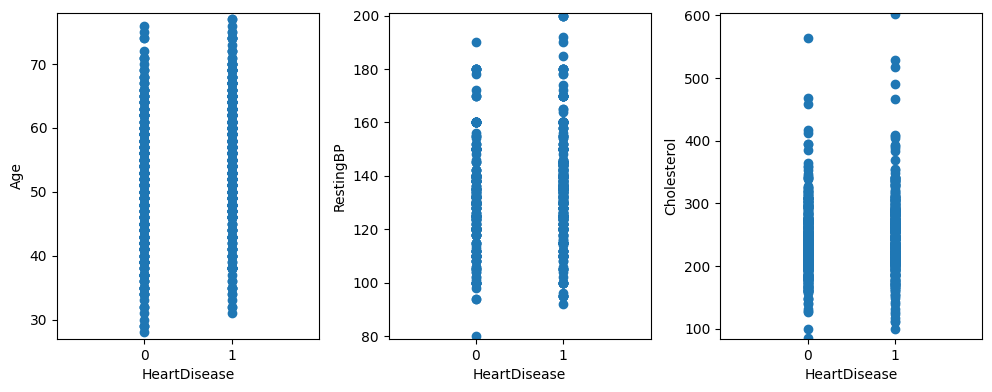

In [9]:
# Step 7. Visualize correlations of numerical variables

# We will do some exploratory data analysis to visualize any relations in our data
# We will use Matplotlib to visualize correlations between the HeartDisease label and the other data columns

# For each data column of (Age, RestingBP and Cholesterol) use Matplotlib to create 
#    a scatter plot with the HeartDisease label (0 or 1) on the x-axis
#    and the value of the column on the y-axis. I.e. there will be three figures
#    Use Matplotlib's scatter function (i.e. plt.scatter)

# For each plot, add appropriate xlabel and ylabel

plt.figure(figsize=(10,4))

# First, create the scatter plot with Age column
x = heart_data['HeartDisease']
y = heart_data['Age']
plt.subplot(131)
plt.scatter(x, y)
plt.xlim(x.min() - 1, x.max() + 1)
plt.ylim(y.min() - 1, y.max() + 1)
plt.xticks([0,1])
plt.xlabel('HeartDisease')
plt.ylabel('Age')

# Second, create the scatter plot with RestingBP column
x = heart_data['HeartDisease']
y = heart_data['RestingBP']
plt.subplot(132)
plt.scatter(x, y)
plt.xlim(x.min() - 1, x.max() + 1)
plt.ylim(y.min() - 1, y.max() + 1)
plt.xticks([0,1])
plt.xlabel('HeartDisease')
plt.ylabel('RestingBP')

# Third, create the scatter plot with Cholesterol column
x = heart_data['HeartDisease']
y = heart_data['Cholesterol']
plt.subplot(133)
plt.scatter(x, y)
plt.xlim(x.min() - 1, x.max() + 1)
plt.ylim(y.min() - 1, y.max() + 1)
plt.xticks([0,1])
plt.xlabel('HeartDisease')
plt.ylabel('Cholesterol')

plt.tight_layout(pad=1, w_pad=1, h_pad=1)

plt.show()

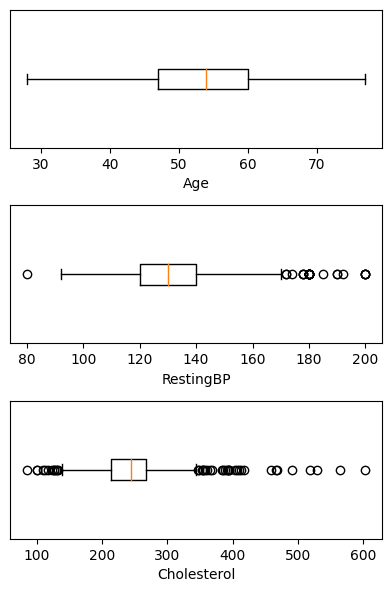

In [10]:
# Step 8. Check for outliers

# For each data column of (Age, RestingBP and Cholesterol) use Matplotlib to create 
#    a boxplot for the values of that data column. I.e. there will be three figures
#    Use Matplotlib's boxplot function

# For each plot, add appropriate axis labels

plt.figure(figsize=(4,6))

# First, create the boxplot with Age column
# Add code for figure here
plt.subplot(311)
plt.boxplot(heart_data['Age'], vert=False)
plt.xlabel('Age')
plt.yticks([])

# Second, create the boxplot with RestingBP column
# Add code for figure here
plt.subplot(312)
plt.boxplot(heart_data['RestingBP'], vert=False)
plt.xlabel('RestingBP')
plt.yticks([])

# Third, create the boxplot with Cholesterol column
# Add code for figure here
plt.subplot(313)
plt.boxplot(heart_data['Cholesterol'], vert=False)
plt.xlabel('Cholesterol')
plt.yticks([])

plt.tight_layout(pad=1, w_pad=1, h_pad=1)

plt.show()